In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)# Adjust the config of the plots we will create

# Read in the data

df = pd.read_csv('/Users/kacpermajek/Desktop/Movies_project_kaggle/movies.csv')

In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# Let's see if there's any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [14]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [18]:
# change data type of columns
df.dropna(subset=['budget', 'gross'], inplace=True)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [19]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


In [25]:
# Creating the 'yearcorrect' column by extracting the year from the 'released' column using str.extract() with Regular Expression
df['yearcorrect'] = df['released'].str.extract('(\d{4})')

# Show the first few rows of the DataFrame to confirm that the new column has been added and populated correctly
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [33]:
df = df.sort_values(by=['gross'], inplace = False,ascending = True)

In [82]:
pd.set_option('display.max_rows',None)

In [88]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False).head(30)


7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
3776                         double A Films
3330            Zucker Brothers Productions
724                        Zoetrope Studios
2213                     Zeta Entertainment
4829                Zentropa Entertainments
1180                   Zenith Entertainment
5180                        Zazen Produções
1321               Zanuck/Brown Productions
1329            Zacharias-Buhai Productions
789               Young Sung Production Co.
5125             Young Hannibal Productions
5499                            Yellow Bird
4618                         Yash Raj Films
4990              Yari Film Group Releasing
5410                  Yari Film Group (YFG)
7003                  X-Filme Creative Pool
6372                Worldview Entertainment
4392            World of Wonder 

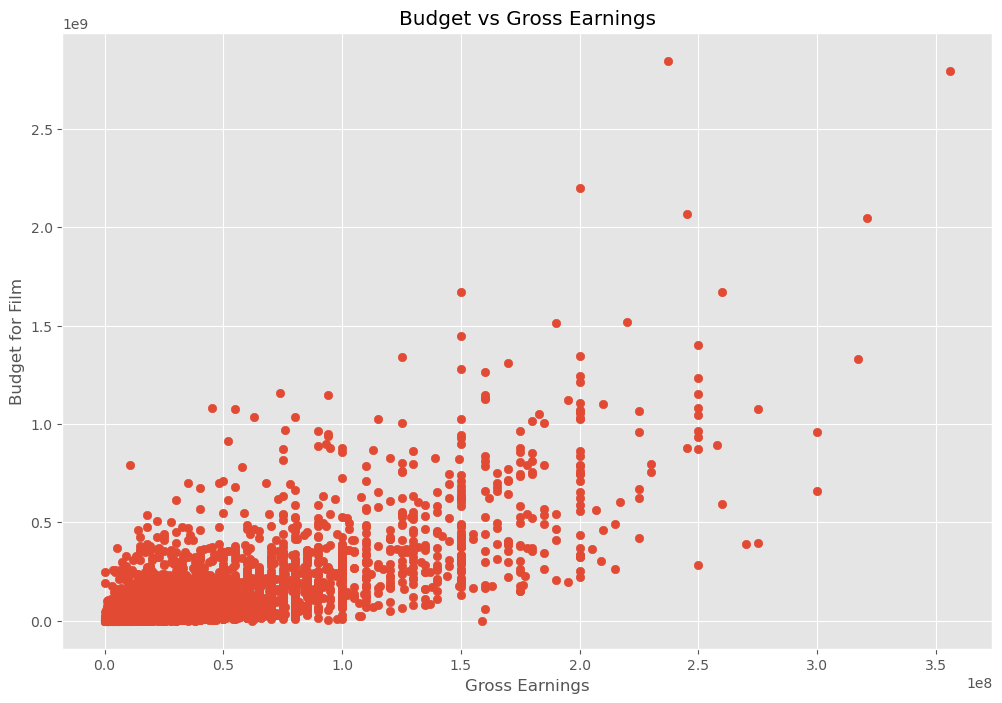

In [35]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [34]:
#df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800.0,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85.0,1997
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994


<Axes: xlabel='budget', ylabel='gross'>

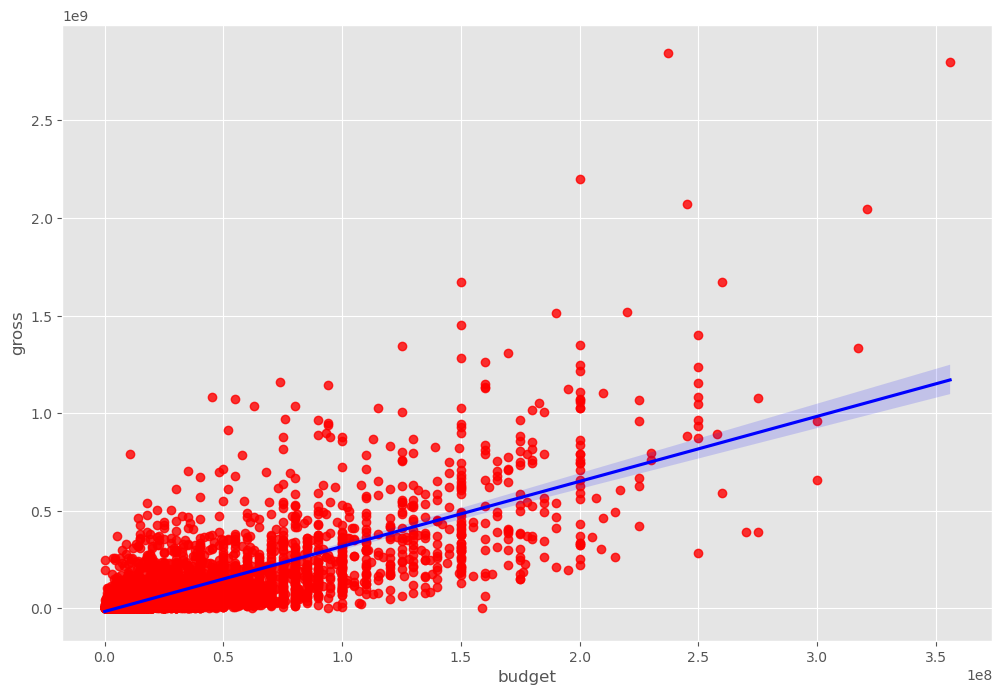

In [39]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [46]:
# Compute the correlation matrix for only numeric columns
correlation_matrix = df.corr(method = 'pearson',numeric_only=True)

# Display the correlation matrix
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.055174  0.205758  0.327781  0.274264  0.074203
score    0.055174  1.000000  0.473809  0.071792  0.222143  0.414580
votes    0.205758  0.473809  1.000000  0.440021  0.614904  0.352437
budget   0.327781  0.071792  0.440021  1.000000  0.740395  0.318595
gross    0.274264  0.222143  0.614904  0.740395  1.000000  0.275596
runtime  0.074203  0.414580  0.352437  0.318595  0.275596  1.000000


In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Loop through columns and encode non-numeric columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Compute the correlation matrix for the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Display the correlation matrix
print(correlation_matrix)


                 name    rating     genre      year  released     score  \
name         1.000000 -0.032518  0.009617  0.024435 -0.005896  0.014955   
rating      -0.032518  1.000000  0.154122  0.016929  0.016318  0.067820   
genre        0.009617  0.154122  1.000000 -0.073026  0.021712  0.034061   
year         0.024435  0.016929 -0.073026  1.000000 -0.001481  0.055174   
released    -0.005896  0.016318  0.021712 -0.001481  1.000000  0.046424   
score        0.014955  0.067820  0.034061  0.055174  0.046424  1.000000   
votes        0.012915  0.003678 -0.136457  0.205758  0.029029  0.473809   
director     0.013699  0.013174 -0.009303 -0.036936  0.003341  0.005573   
writer       0.011602  0.000325  0.017500 -0.024568  0.008514  0.012860   
star        -0.007109  0.013736  0.002619 -0.032770  0.015363  0.009121   
country     -0.025654  0.002309 -0.008909 -0.065281 -0.017224 -0.045227   
budget       0.023698 -0.205151 -0.368900  0.327781  0.019888  0.071792   
gross        0.005966 -0.

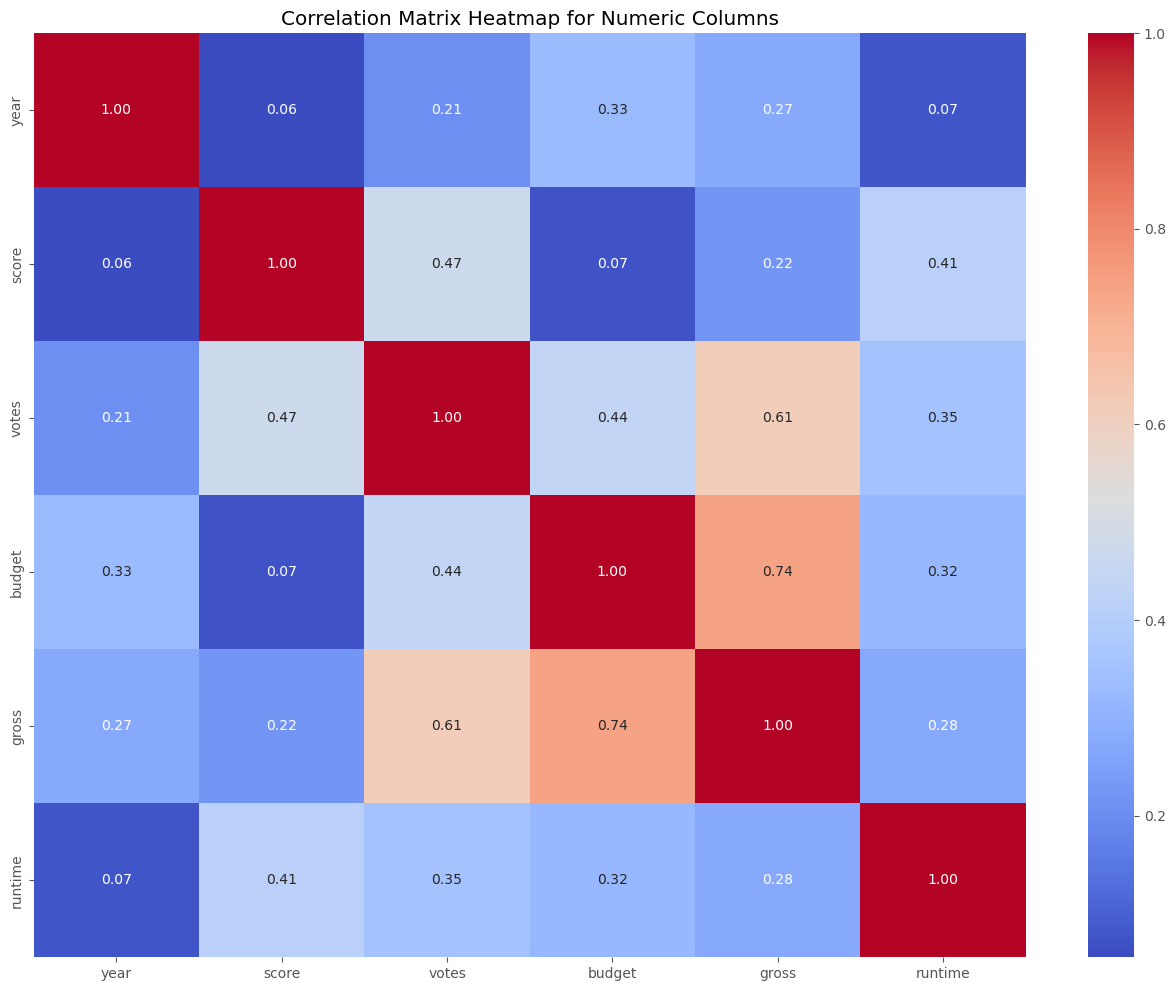

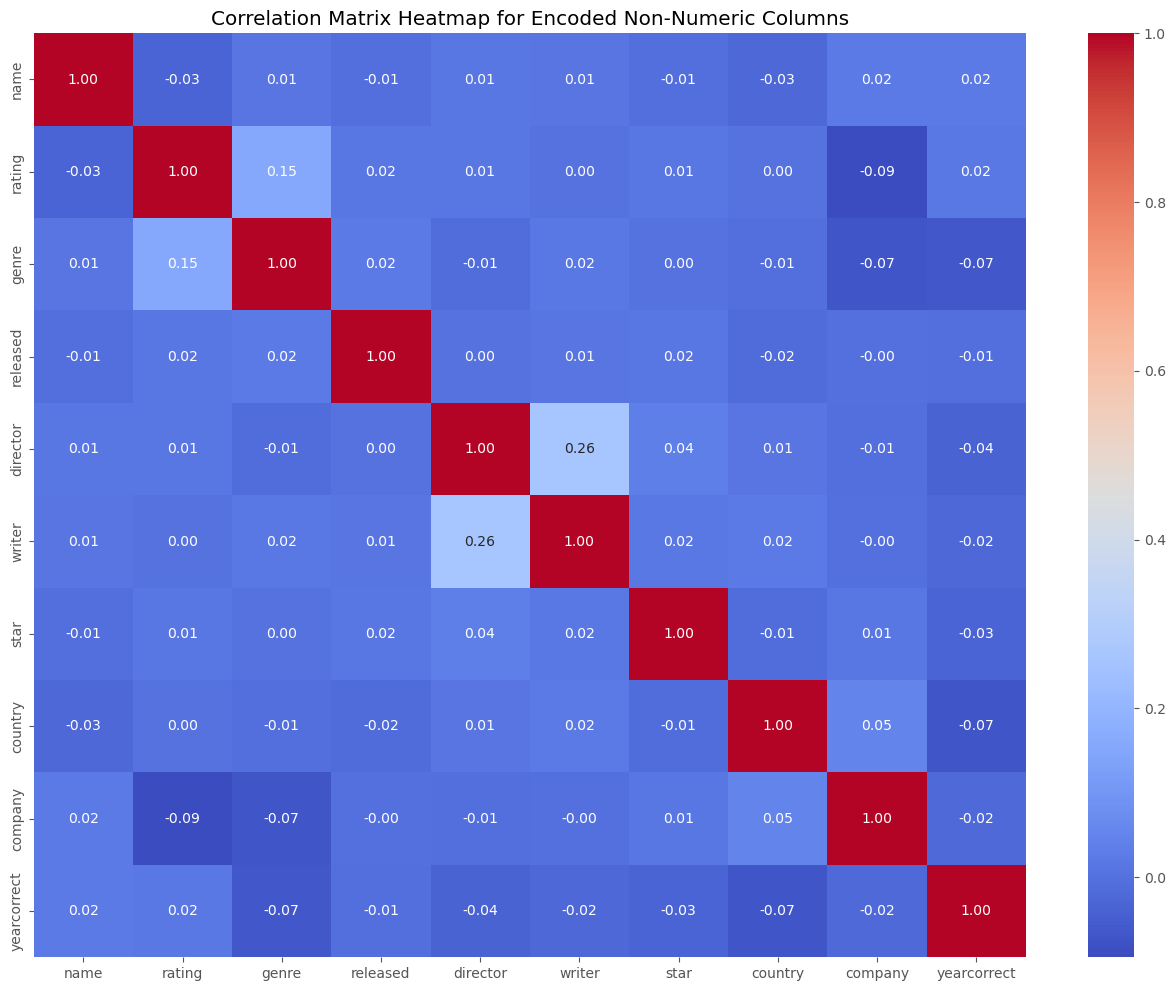

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Loop through non-numeric columns and encode them
for col in non_numeric_columns:
    df_encoded[col] = label_encoder.fit_transform(df[col].astype(str))

# Compute the correlation matrix for numeric columns
correlation_matrix_numeric = df.corr(numeric_only=True)

# Compute the correlation matrix for encoded non-numeric columns only
correlation_matrix_non_numeric = df_encoded[non_numeric_columns].corr()

# Plotting the heatmap for numeric columns
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.show()

# Plotting the heatmap for non-numeric columns
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_non_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Encoded Non-Numeric Columns')
plt.show()


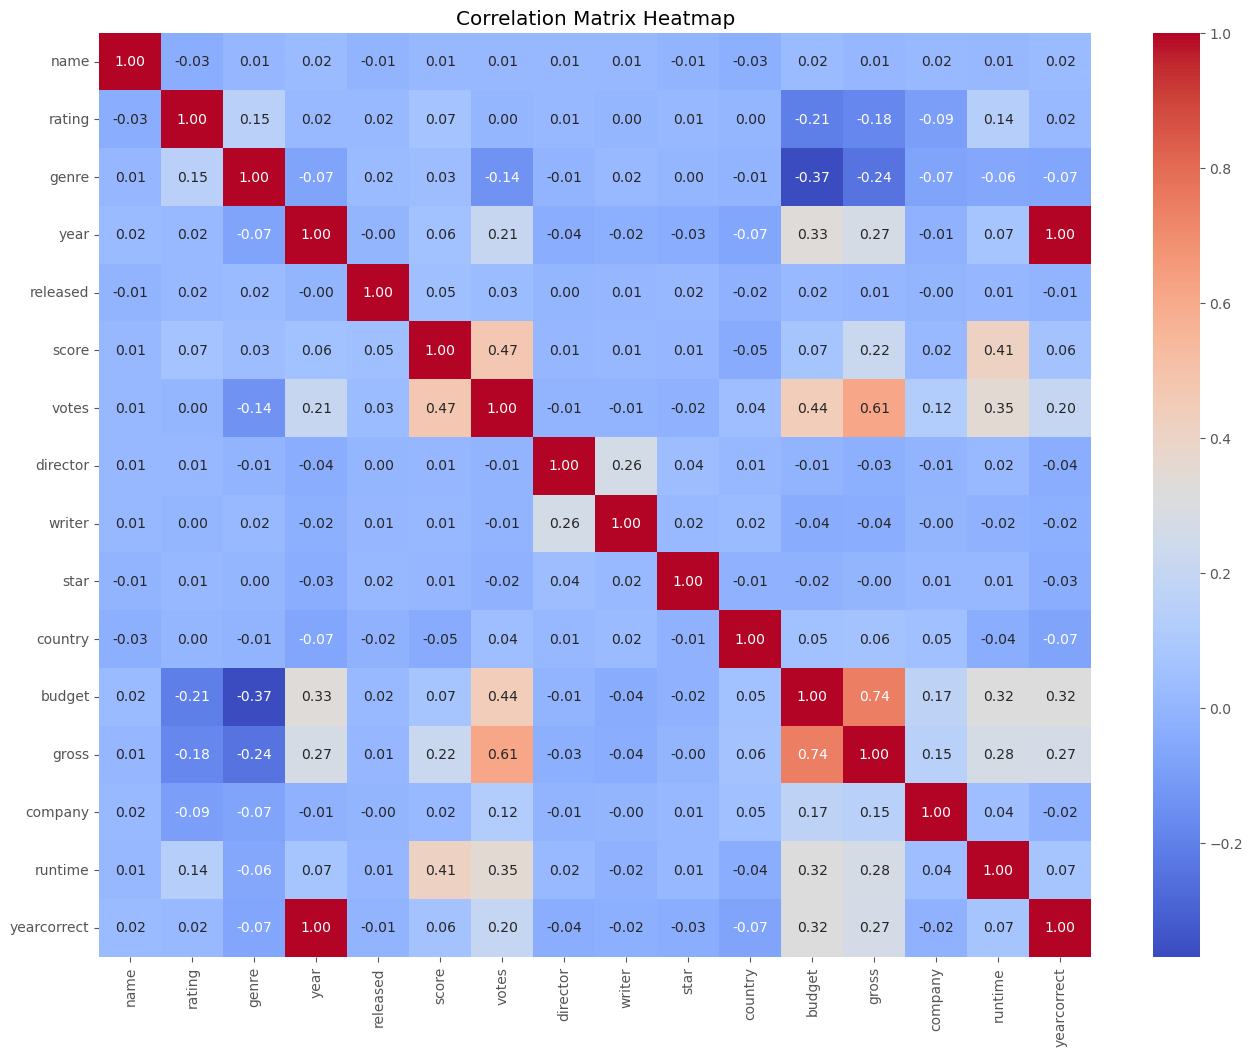

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original data
df_encoded = df.copy()

# Loop through columns and encode non-numeric columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

# Compute the correlation matrix for the encoded DataFrame
correlation_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [57]:
# Compute the correlation matrix for all columns in the encoded DataFrame
correlation_matrix_all = df_encoded.corr()

# Unstack the correlation matrix and sort it by absolute value
unstacked_all = correlation_matrix_all.unstack().sort_values(key=abs, ascending=False)

# Filter out self-correlations
unstacked_all = unstacked_all[unstacked_all != 1.0]

# Create a set to store unique pairs
unique_pairs = set()

# Create an empty list to store the indices of unique pairs
unique_indices = []

# Iterate over the MultiIndex to identify unique pairs
for idx in unstacked_all.index:
    pair = tuple(sorted(idx))
    if pair not in unique_pairs:
        unique_pairs.add(pair)
        unique_indices.append(idx)

# Use the unique indices to filter the original unstacked Series
unstacked_all = unstacked_all.loc[unique_indices]

# Display all unique correlations sorted by absolute value
print("All Unique Correlations Sorted by Absolute Value:")
print(unstacked_all)


All Unique Correlations Sorted by Absolute Value:
year         yearcorrect    0.998641
gross        budget         0.740395
             votes          0.614904
score        votes          0.473809
budget       votes          0.440021
score        runtime        0.414580
genre        budget        -0.368900
runtime      votes          0.352437
year         budget         0.327781
budget       yearcorrect    0.320245
runtime      budget         0.318595
gross        runtime        0.275596
year         gross          0.274264
gross        yearcorrect    0.268626
writer       director       0.262940
genre        gross         -0.244380
score        gross          0.222143
year         votes          0.205758
budget       rating        -0.205151
votes        yearcorrect    0.202883
gross        rating        -0.181540
company      budget         0.170501
genre        rating         0.154122
company      gross          0.149624
rating       runtime        0.138762
genre        votes       

In [58]:
# ... [previous code for calculating unstacked_all remains the same]

# Convert the Series to a DataFrame and reset the index
unstacked_all_df = unstacked_all.reset_index()
unstacked_all_df.columns = ['Column1', 'Column2', 'Correlation']

# Display all unique correlations sorted by absolute value
print("All Unique Correlations Sorted by Absolute Value:")
print(unstacked_all_df)


All Unique Correlations Sorted by Absolute Value:
         Column1      Column2  Correlation
0           year  yearcorrect     0.998641
1          gross       budget     0.740395
2          gross        votes     0.614904
3          score        votes     0.473809
4         budget        votes     0.440021
5          score      runtime     0.414580
6          genre       budget    -0.368900
7        runtime        votes     0.352437
8           year       budget     0.327781
9         budget  yearcorrect     0.320245
10       runtime       budget     0.318595
11         gross      runtime     0.275596
12          year        gross     0.274264
13         gross  yearcorrect     0.268626
14        writer     director     0.262940
15         genre        gross    -0.244380
16         score        gross     0.222143
17          year        votes     0.205758
18        budget       rating    -0.205151
19         votes  yearcorrect     0.202883
20         gross       rating    -0.181540
21  

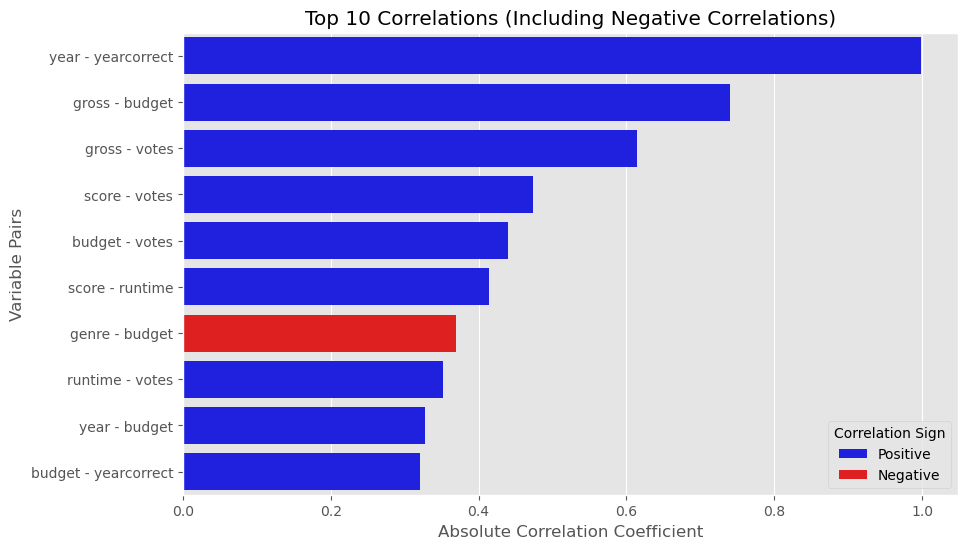

In [64]:
# Sample data for demonstration. Replace this with your actual top 10 correlations.
sample_data = {
    'Column1': ['year', 'gross', 'gross', 'score', 'budget', 'score', 'genre', 'runtime', 'year', 'budget', 'runtime'],
    'Column2': ['yearcorrect', 'budget', 'votes', 'votes', 'votes', 'runtime', 'budget', 'votes', 'budget', 'yearcorrect', 'budget'],
    'Correlation': [0.998641, 0.740395, 0.614904, 0.473809, 0.440021, 0.414580, -0.368900, 0.352437, 0.327781, 0.320245, 0.318595]
}

df_sample = pd.DataFrame(sample_data).copy()  # Explicitly making a copy

# Create a new column that will contain the absolute value of the correlation
df_sample['AbsCorrelation'] = df_sample['Correlation'].abs()

# Sort by the absolute value of the correlation
df_sample = df_sample.sort_values(by=['AbsCorrelation'], ascending=False).head(10).copy()  # Explicitly making a copy

# Create a new column combining Column1 and Column2 for better labeling
df_sample['Pair'] = df_sample['Column1'] + ' - ' + df_sample['Column2']

# Add a 'Sign' column to indicate positive or negative correlation
df_sample['Sign'] = df_sample['Correlation'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sample, y='Pair', x='AbsCorrelation', hue='Sign', dodge=False, palette={'Positive': 'blue', 'Negative': 'red'})
plt.legend(title='Correlation Sign', loc='lower right')
plt.title('Top 10 Correlations (Including Negative Correlations)')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()


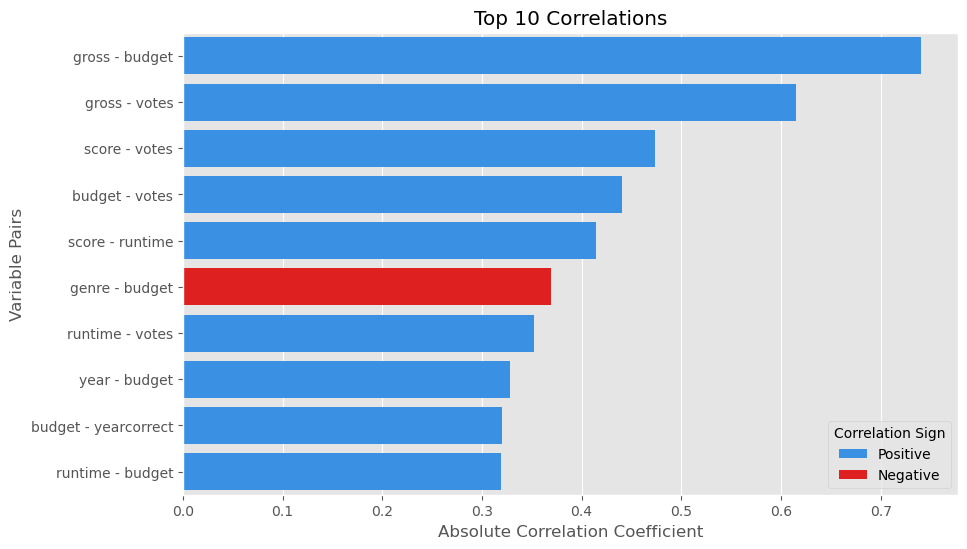

In [66]:
# Sample data for demonstration. Replace this with your actual top 10 correlations.
# Removed 'year - yearcorrect' and added the 11th top correlation ('runtime - budget')
sample_data = {
    'Column1': ['gross', 'gross', 'score', 'budget', 'score', 'genre', 'runtime', 'year', 'budget', 'runtime'],
    'Column2': ['budget', 'votes', 'votes', 'votes', 'runtime', 'budget', 'votes', 'budget', 'yearcorrect', 'budget'],
    'Correlation': [0.740395, 0.614904, 0.473809, 0.440021, 0.414580, -0.368900, 0.352437, 0.327781, 0.320245, 0.318595]
}

df_sample = pd.DataFrame(sample_data).copy()  # Explicitly making a copy

# Create a new column that will contain the absolute value of the correlation
df_sample['AbsCorrelation'] = df_sample['Correlation'].abs()

# Sort by the absolute value of the correlation
df_sample = df_sample.sort_values(by=['AbsCorrelation'], ascending=False).copy()  # Explicitly making a copy

# Create a new column combining Column1 and Column2 for better labeling
df_sample['Pair'] = df_sample['Column1'] + ' - ' + df_sample['Column2']

# Add a 'Sign' column to indicate positive or negative correlation
df_sample['Sign'] = df_sample['Correlation'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_sample, y='Pair', x='AbsCorrelation', hue='Sign', dodge=False, palette={'Positive': 'dodgerblue', 'Negative': 'red'})
plt.legend(title='Correlation Sign', loc='lower right')
plt.title('Top 10 Correlations')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Variable Pairs')
plt.show()
